<a href="https://colab.research.google.com/github/youngsoomoon/Algorithm/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 모델 만들기
k-최근접 이웃 알고리즘은 예측모델을 훈련데이터셋의 근처 데이터들로 예측을 하기 때문에 기존 데이터의 범위에서 크게 벗어나게 되면 정확도가 떨어지게 된다는 한계점이있다.
## 아주 큰 농어

In [5]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [8]:
distance, indexes = knr.kneighbors([[50]])

In [10]:
import matplotlib.pyplot as plt

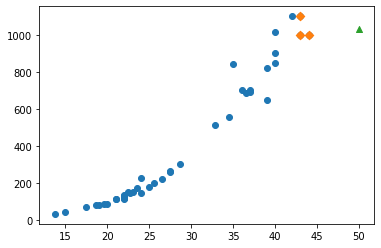

In [13]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm  농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

# 선형 회귀 (LinearRegression)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


lr.coef_  : 기울기 계수 (coefficient)
lr.intercept_ : 절편 (intercept)

In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


## 학습한 직선 그리기

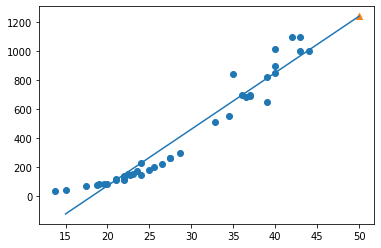

In [16]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

테스트셋 점수가 낮아서 과소적합 된 것으로 짐작되고, 


훈련데이터셋도 점수가 낮기때문에 과대적합도 고려해봐야함

In [18]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


* 농어들의 데이터 산점도를 보면 직선보다는 곡선의 형태가 정확성이 높을 것이므로 2차방정식을 활용해 점수를 높힌다.

# 다항회귀
길이의 데이터는 이미 있기때문에 길이제곱의 컬럼을 만들어서 2차함수 그래프를 그린다.

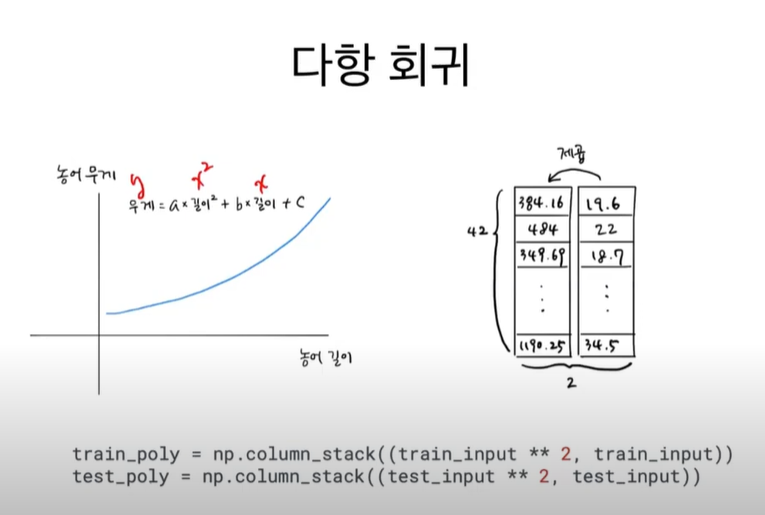

In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2 , test_input))

In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


## 학습한 직선 그리기

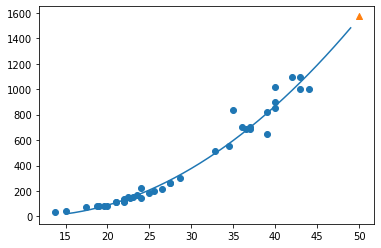

0.9706807451768623
0.9775935108325122


In [22]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

*  결과 : 선형회귀보다 정확도가 높아졌기 때문에 점수가 더 높게 나왔고 테스트셋의 점수가 훈련데이터보다 높기때문에 훈련데이터를 조금 더 복잡하고 과대적합시킬 필요가 있다.